In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


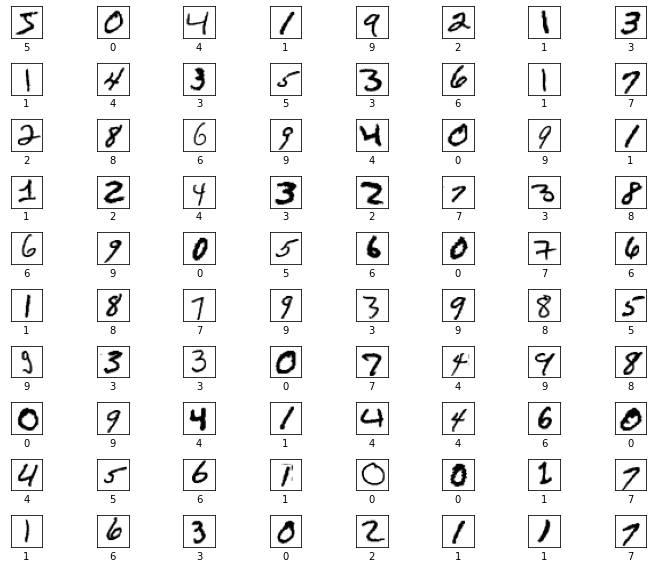

In [3]:
i = 0
plt.figure(figsize=(10,8))
for i in range(80):
    plt.subplot(10,8, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
plt.tight_layout()
plt.show()

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [6]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
Adam = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.3, batch_size=64)

Epoch 1/5
657/657 [==============================] - 15s 20ms/step - loss: 0.4973 - accuracy: 0.8505 - val_loss: 0.0862 - val_accuracy: 0.9747
Epoch 2/5
657/657 [==============================] - 11s 18ms/step - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0618 - val_accuracy: 0.9822
Epoch 3/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0465 - accuracy: 0.9846 - val_loss: 0.0656 - val_accuracy: 0.9794
Epoch 4/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 5/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0497 - val_accuracy: 0.9854


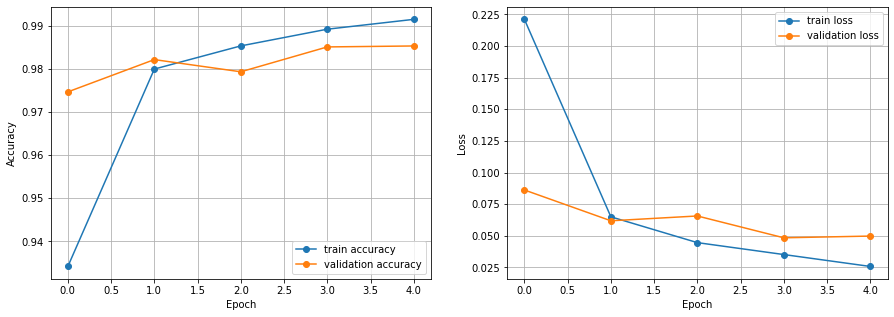

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(Adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(Adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(Adam.history['loss'], 'o-', label='train loss')
plt.plot(Adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.0389 - accuracy: 0.9882

Test accuracy: 0.9882000088691711

Test Loss: 0.03894855082035065


In [10]:
model.compile(
   optimizer='SGD', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [11]:
sgd = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.3, batch_size=64)

Epoch 1/5
657/657 [==============================] - 13s 19ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 2/5
657/657 [==============================] - 12s 19ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0376 - val_accuracy: 0.9896
Epoch 3/5
657/657 [==============================] - 12s 19ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0376 - val_accuracy: 0.9895
Epoch 4/5
657/657 [==============================] - 12s 19ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 5/5
657/657 [==============================] - 12s 19ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0372 - val_accuracy: 0.9901


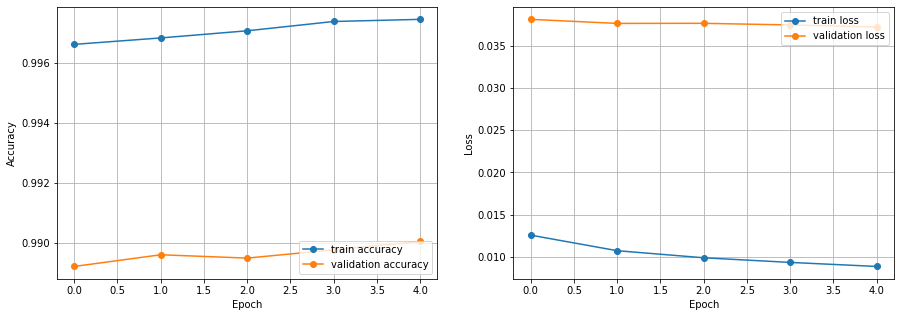

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(sgd.history['loss'], 'o-', label='train loss')
plt.plot(sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0273 - accuracy: 0.9912

Test accuracy: 0.9911999702453613

Test Loss: 0.027340948581695557


In [14]:
model.compile(
   optimizer='RMSProp', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [15]:
RmsProp = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.3, batch_size=64)

Epoch 1/5
657/657 [==============================] - 16s 23ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.0494 - val_accuracy: 0.9871
Epoch 2/5
657/657 [==============================] - 14s 22ms/step - loss: 0.0134 - accuracy: 0.9953 - val_loss: 0.0414 - val_accuracy: 0.9889
Epoch 3/5
657/657 [==============================] - 14s 21ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0476 - val_accuracy: 0.9883
Epoch 4/5
657/657 [==============================] - 14s 21ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0499 - val_accuracy: 0.9885
Epoch 5/5
657/657 [==============================] - 14s 21ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0565 - val_accuracy: 0.9895


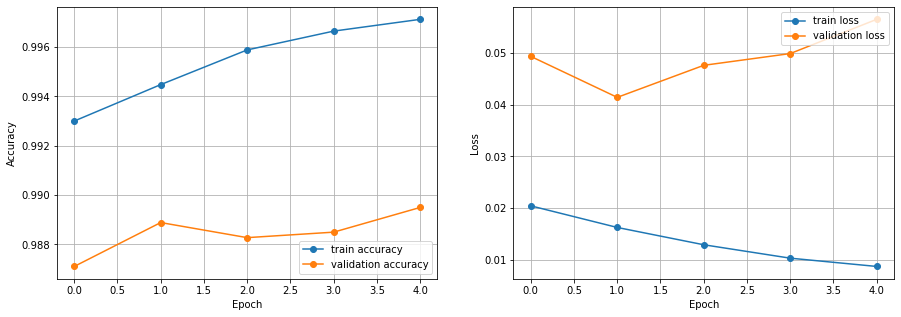

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(RmsProp.history['accuracy'], 'o-', label='train accuracy')
plt.plot(RmsProp.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(RmsProp.history['loss'], 'o-', label='train loss')
plt.plot(RmsProp.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0387 - accuracy: 0.9919

Test accuracy: 0.9919000267982483

Test Loss: 0.03866403549909592


In [18]:
predictions = model.predict(x_test)

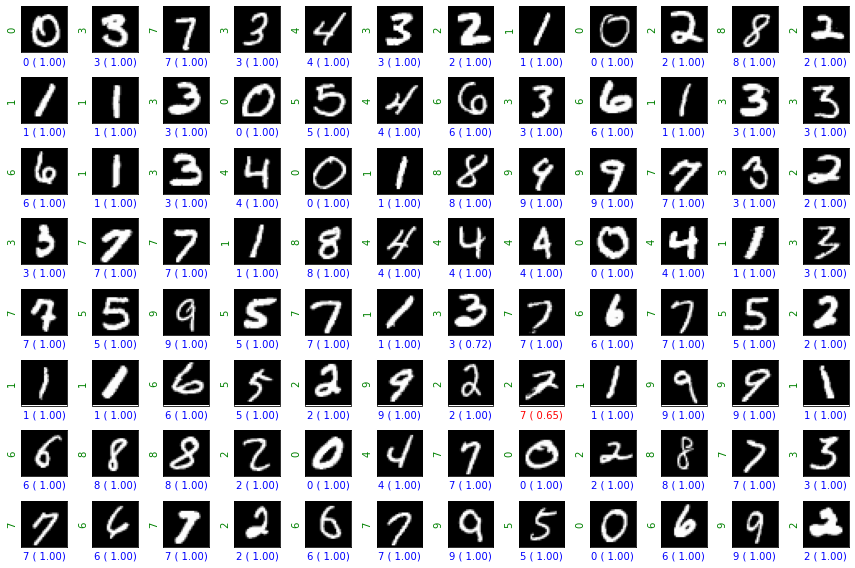

In [21]:
ROWS = 8
COLS = 12

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(12,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()